# sprint15-Transfer-Learning

In [1]:
import os
#画像を読むためにパスを取得する
path = "/home/ubuntu/DIC/fruits/"
os.chdir(path)
os.getcwd()

'/home/ubuntu/DIC/fruits'

# 1.1 Importする

In [2]:
import numpy as np
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/ubuntu/DIC/out/'
prefix = 'vgg16'
n_train_samples = 2000
train_file_name = 'bottleneck_features_train.npy'

n_validation_samples = 800
validation_file_name = 'bottleneck_features_validation.npy'

Using TensorFlow backend.


In [3]:
import sys

In [4]:
sys.executable

'/home/ubuntu/anaconda3/envs/tensorflow_p36/bin/python'

# 1-1. image dataからBottleneck Features data を作る 

In [5]:
# VGG16 model & weight
model = VGG16(include_top=False, weights='imagenet')
model.summary()

#重みを学習させないようにする
model.trainable = False

# imageデータをNumpy配列に変換：imageDataGeneratorを使用して
## flow_from_directoryは、ディレクトリごと指定できる
image_data_generator = ImageDataGenerator(rescale=1.0/255)
train_data = image_data_generator.flow_from_directory(
    './Training',
    target_size=(100, 100),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

## validation data 
image_data_generator = ImageDataGenerator(rescale=1.0/255)
validation_data = image_data_generator.flow_from_directory(
    './Test',
    target_size=(100, 100),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Generate bottleneck featuresata using VGG16
## training data
bottleneck_feature_train = model.predict_generator(train_data, n_train_samples, verbose=1)

## validation data 
bottleneck_feature_validation = model.predict_generator(validation_data, n_validation_samples, verbose=1)

# Save bottleneck features training data
## traning data
np.save(base_dir + prefix + train_file_name, bottleneck_feature_train)

## validation data
np.save(base_dir + prefix + validation_file_name, bottleneck_feature_validation)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

# 1-2. ボトルネック層のデータをロードする

In [ ]:
#Trainの方

In [45]:
#画像の分類を作るために分類ごとのディレクトリ名をリストにする
path = "/home/ubuntu/DIC/fruits/Training"
os.chdir(path)
cwd = os.getcwd()
listdir =os.listdir('./')
print(listdir)

['Peach', 'Cantaloupe 1', 'Grape White', 'Papaya', 'Tomato 1', 'Cherry 2', 'Pear Monster', 'Mulberry', 'Cantaloupe 2', 'Apple Golden 1', 'Cherry Rainier', 'Walnut', 'Apple Red Delicious', 'Guava', 'Kiwi', 'Cactus fruit', 'Salak', 'Avocado ripe', 'Apricot', 'Apple Red Yellow', 'Quince', 'Physalis', 'Tangelo', 'Cherry 1', 'Tomato Maroon', 'Passion Fruit', 'Cherry Wax Red', 'Maracuja', 'Kumquats', 'Grapefruit Pink', 'Apple Granny Smith', 'Huckleberry', 'Tomato 4', 'Apple Red 2', 'Pineapple', 'Apple Red 1', 'Grape White 2', 'Avocado', 'Pitahaya Red', 'Nectarine', 'Pomegranate', 'Carambula', 'Strawberry Wedge', 'Mango', 'Kaki', 'Rambutan', 'Tomato 2', 'Dates', 'Granadilla', 'Lemon Meyer', 'Lychee', 'Peach Flat', 'Limes', 'Banana', 'Clementine', 'Tomato 3', 'Melon Piel de Sapo', 'Orange', 'Apple Golden 3', 'Pepino', 'Banana Red', 'Physalis with Husk', 'Apple Golden 2', 'Apple Braeburn', 'Pear', 'Cherry Wax Yellow', 'Apple Red 3', 'Raspberry', 'Strawberry', 'Cherry Wax Black', 'Mandarine', 'P

In [46]:
from PIL import Image
import os, glob
import numpy as np
#from sklearn import cross_validation

classes = listdir
num_classes = len(classes)
image_size = 100

# 画像の読み込み

train_data=[]
train_labels=[]
for index, classlabel in enumerate(classes):
    photos_dir = "/home/ubuntu/DIC/fruits/Training/" + classlabel
    files = glob.glob(photos_dir +"/*.jpg")
    #files = glob.glob(photos_dir + "/home/ubuntu/DIC/fruits/Training/*.jpg")
    for i, file in enumerate(files):
        if i >= 10000: break
        image = Image.open(file)
        image = image.convert('RGB') #GrayScale を指定（注意としてはLをしているするともともと次元がなくなる）
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        train_data.append(data)
        train_labels.append(index)

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [56]:
#One-hot
output_size=len(set(train_labels))
output_size
train_labels=np.identity(output_size)[train_labels]
train_labels.shape

(41322, 81)

In [47]:
#Test

In [48]:
#画像の分類を作るために分類ごとのディレクトリ名をリストにする
path = "/home/ubuntu/DIC/fruits/Test"
os.chdir(path)
cwd = os.getcwd()
listdir_v =os.listdir('./')
print(listdir_v)

['Peach', 'Cantaloupe 1', 'Grape White', 'Papaya', 'Tomato 1', 'Cherry 2', 'Pear Monster', 'Mulberry', 'Cantaloupe 2', 'Apple Golden 1', 'Cherry Rainier', 'Walnut', 'Apple Red Delicious', 'Guava', 'Kiwi', 'Cactus fruit', 'Salak', 'Avocado ripe', 'Apricot', 'Apple Red Yellow', 'Quince', 'Physalis', 'Tangelo', 'Cherry 1', 'Tomato Maroon', 'Passion Fruit', 'Cherry Wax Red', 'Maracuja', 'Kumquats', 'Grapefruit Pink', 'Apple Granny Smith', 'Huckleberry', 'Tomato 4', 'Apple Red 2', 'Pineapple', 'Apple Red 1', 'Grape White 2', 'Avocado', 'Pitahaya Red', 'Nectarine', 'Pomegranate', 'Carambula', 'Strawberry Wedge', 'Mango', 'Kaki', 'Rambutan', 'Tomato 2', 'Dates', 'Granadilla', 'Lemon Meyer', 'Lychee', 'Peach Flat', 'Limes', 'Banana', 'Clementine', 'Tomato 3', 'Melon Piel de Sapo', 'Orange', 'Apple Golden 3', 'Pepino', 'Banana Red', 'Physalis with Husk', 'Apple Golden 2', 'Apple Braeburn', 'Pear', 'Cherry Wax Yellow', 'Apple Red 3', 'Raspberry', 'Strawberry', 'Cherry Wax Black', 'Mandarine', 'P

In [49]:
from PIL import Image
import os, glob
import numpy as np
#from sklearn import cross_validation

classes = listdir_v
num_classes = len(classes)
image_size = 100

# 画像の読み込み

validation_data=[]
validation_labels=[]
for index, classlabel in enumerate(classes):
    photos_dir = "/home/ubuntu/DIC/fruits/Test/" + classlabel
    files = glob.glob(photos_dir +"/*.jpg")
    #files = glob.glob(photos_dir + "/home/ubuntu/DIC/fruits/Training/*.jpg")
    for i, file in enumerate(files):
        if i >= 10000: break
        image = Image.open(file)
        image = image.convert('RGB') #GrayScale を指定（注意としてはLをしているするともともと次元がなくなる）
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        validation_data.append(data)
        validation_labels.append(index)

validation_data = np.array(validation_data)
validation_labels = np.array(validation_labels)

In [57]:
#One-hot
output_size=len(set(validation_labels))
output_size
validation_labels=np.identity(output_size)[validation_labels]
validation_labels.shape

(13877, 81)

In [58]:
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape

((41322, 100, 100, 3), (41322, 81), (13877, 100, 100, 3), (13877, 81))

In [51]:
#train_data  = np.load(base_dir + prefix + train_file_name)
#len_input_samples = len(train_data)
#train_labels = np.array([0] * int(len_input_samples/2) + [1] * int(len_input_samples / 2))

#validation_data = np.load(base_dir + prefix + validation_file_name)
#len_output_samples = len(validation_data)
#validation_labels_ = np.array([0] * int(len_output_samples / 2) + [1] * int(len_output_samples / 2))
#validation_labels = np.array([0] * int(n_validation_samples / 2 *32) + [1] * int(n_validation_samples / 2 * 32))

# 2. モデルを作成しておく

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers

input_shape = train_data.shape[1:]

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(81, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

# 3. Trainモデル（Tensorboard, 重みを保存して）

In [60]:
result_dir =  '/home/ubuntu/DIC/out/history_vgg16_transfer_learning.txt'

# Kerasでテンサーボードを呼び出す
callbacks = keras.callbacks.TensorBoard(log_dir='/home/ubuntu/DIC/out/tensorBoard', histogram_freq=0)

# train model
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, callbacks=[callbacks], validation_data=(validation_data, validation_labels))

# Save weight
model.save_weights('/home/ubuntu/DIC/out/vgg16_transferlearning_weights.h5')

# Save history
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

with open(result_dir, "w") as fp:
    fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
    for i in range(len(acc)):
        fp.write("%d\t%f\t%f\t%f\t%f\n" % (i, loss[i], acc[i], val_loss[i], val_acc[i]))

Train on 41322 samples, validate on 13877 samples
Epoch 1/20
41322/41322 [==============================] - 41s 1ms/step - loss: 0.3905 - acc: 0.9756 - val_loss: 0.3917 - val_acc: 0.9756
Epoch 2/20
41322/41322 [==============================] - 36s 861us/step - loss: 0.3916 - acc: 0.9756 - val_loss: 0.3917 - val_acc: 0.9756
Epoch 3/20
41322/41322 [==============================] - 36s 859us/step - loss: 0.3917 - acc: 0.9756 - val_loss: 0.3917 - val_acc: 0.9756
Epoch 4/20
41322/41322 [==============================] - 36s 862us/step - loss: 0.3917 - acc: 0.9756 - val_loss: 0.3917 - val_acc: 0.9756
Epoch 5/20
41322/41322 [==============================] - 36s 863us/step - loss: 0.3917 - acc: 0.9756 - val_loss: 0.3917 - val_acc: 0.9756
Epoch 6/20
41322/41322 [==============================] - 36s 866us/step - loss: 0.3917 - acc: 0.9756 - val_loss: 0.3917 - val_acc: 0.9756
Epoch 7/20
41322/41322 [==============================] - 36s 865us/step - loss: 0.3917 - acc: 0.9756 - val_loss: 0.39

# 4. Fine Tuning Model

In [5]:
from keras.layers import Input
import numpy as np
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

In [6]:
image_data_generator = ImageDataGenerator(rescale=1.0/255)
train_data = image_data_generator.flow_from_directory(
    '/home/ubuntu/DIC/fruits/Training',
    target_size=(100, 100),
    batch_size=32,
    shuffle=True
)

Found 41322 images belonging to 81 classes.


In [7]:
input_tensor = Input(shape=(100, 100, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# FC層を構築
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(81, activation='softmax'))

# VGG16とFCを接続
model = Model(input=vgg16.input, output=top_model(vgg16.output))

# 最後のconv層の直前までの層をfreeze
for layer in model.layers[:15]:
    layer.trainable = False

# Fine-tuningのときはSGDの方がよい
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  if sys.path[0] == '':


In [8]:
history = model.fit_generator(train_data, epochs=2, verbose=1)

Epoch 1/2
1292/1292 [==============================] - 328s 254ms/step - loss: 2.6313 - acc: 0.3963
Epoch 2/2
1292/1292 [==============================] - 327s 253ms/step - loss: 0.5769 - acc: 0.8587


## 以下は自分用参考コード(TensorFlowでの転移学習：途中）

# Import

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import ops
ops.reset_default_graph()

from keras.preprocessing.image import load_img
import os, stat
import shutil

from PIL import Image

import pandas as pd
import seaborn as sns 
sns.set()
from scipy import misc
import imageio as im
import warnings
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

import os
import time

Using TensorFlow backend.


## 画像を読むためにパスを取得する

In [2]:
#画像を読むためにパスを取得する
path = "/Users/szkhome/diveintocode-term0/sprint18/fruits-360/Training/"
os.chdir(path)
#os.getcwd()

## 中身をチェックする

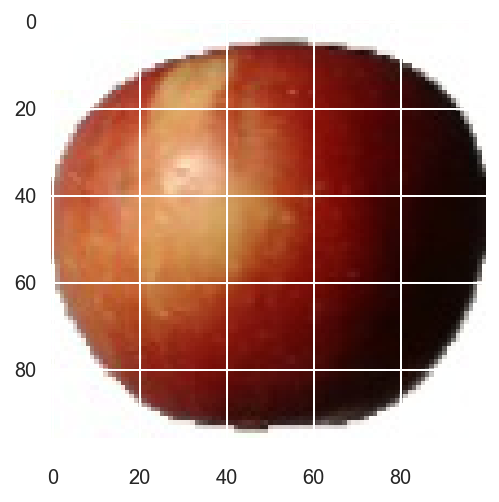

In [3]:
#中身をチェックする
img = im.imread('Apple Braeburn/0_100.jpg')
plt.imshow(img)
#plt.imshow(img, cmap='gray')

In [4]:
##大きさを取得しておく
print(type(img))
print(img.shape)
print(type(img.shape))

<class 'imageio.core.util.Image'>
(100, 100, 3)
<class 'tuple'>


In [5]:
img = Image.open('Apple Braeburn/0_100.jpg')
#img = Image.open('data/src/lena_square.png')

img = img.resize((224, 224))
#img_resize.save('data/dst/lena_pillow_resize_nearest.jpg')

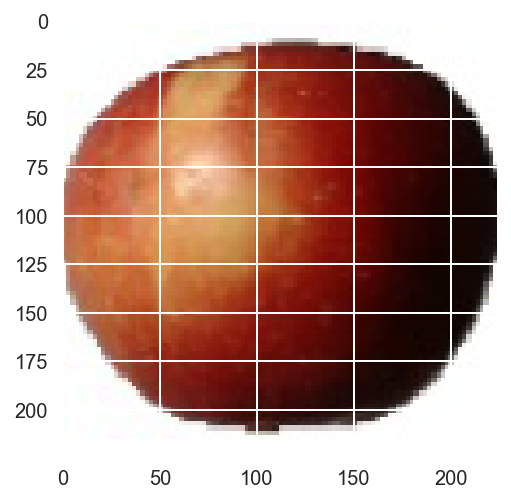

In [6]:
plt.imshow(img)

In [7]:
# arrayに直しておく
img = np.asarray(img)

In [8]:
##大きさを取得しておく
print(type(img))
print(img.shape)
print(type(img.shape))

<class 'numpy.ndarray'>
(224, 224, 3)
<class 'tuple'>


## 画像をNumpy 配列形式に変換

In [9]:
#画像の分類を作るために分類ごとのディレクトリ名をリストにする
path = "/Users/szkhome/diveintocode-term0/sprint18/fruits-360/Training/"
os.chdir(path)
cwd = os.getcwd()
listdir =os.listdir('./')
print(listdir)

['Apple Red Delicious', 'Huckleberry', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Avocado', 'Pomegranate', 'Dates', 'Carambula', '.DS_Store', 'Granadilla', 'Tamarillo', 'Kiwi', 'Cherry Wax Yellow', 'Lemon', 'Guava', 'Apple Golden 2', 'Apple Red 1', 'Mandarine', 'Quince', 'Strawberry Wedge', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Apple Golden 3', 'Grape Pink', 'Banana Red', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Plum', 'Nectarine', 'Cherry Wax Black', 'Cantaloupe 2', 'Lychee', 'Clementine', 'Cherry 2', 'Pineapple Mini', 'Rambutan', 'Grape White', 'Apple Braeburn', 'Tomato Maroon', 'Mango', 'Cocos', 'Mulberry', 'Avocado ripe', 'Passion Fruit', 'Apple Granny Smith', 'Kumquats', 'Grape White 2', 'Apricot', 'Limes', 'Apple Red Yellow', 'Pear Williams', 'Salak', 'Grapefruit Pink', 'Apple Golden 1', 'Banana', 'Apple Red 2', 'Physalis with Husk', 'Lemon Meyer', 'Pepino', 'Tangelo', 'Cactus fruit', 'Papaya', 'Apple Red 3', 'Walnut', 'Pear Abate', 'Pineapple', 'Tomato Ch

In [10]:
listdir.pop(10)
listdir

['Apple Red Delicious',
 'Huckleberry',
 'Melon Piel de Sapo',
 'Pear',
 'Cherry 1',
 'Strawberry',
 'Avocado',
 'Pomegranate',
 'Dates',
 'Carambula',
 'Granadilla',
 'Tamarillo',
 'Kiwi',
 'Cherry Wax Yellow',
 'Lemon',
 'Guava',
 'Apple Golden 2',
 'Apple Red 1',
 'Mandarine',
 'Quince',
 'Strawberry Wedge',
 'Pear Monster',
 'Raspberry',
 'Pitahaya Red',
 'Apple Golden 3',
 'Grape Pink',
 'Banana Red',
 'Physalis',
 'Cherry Rainier',
 'Maracuja',
 'Plum',
 'Nectarine',
 'Cherry Wax Black',
 'Cantaloupe 2',
 'Lychee',
 'Clementine',
 'Cherry 2',
 'Pineapple Mini',
 'Rambutan',
 'Grape White',
 'Apple Braeburn',
 'Tomato Maroon',
 'Mango',
 'Cocos',
 'Mulberry',
 'Avocado ripe',
 'Passion Fruit',
 'Apple Granny Smith',
 'Kumquats',
 'Grape White 2',
 'Apricot',
 'Limes',
 'Apple Red Yellow',
 'Pear Williams',
 'Salak',
 'Grapefruit Pink',
 'Apple Golden 1',
 'Banana',
 'Apple Red 2',
 'Physalis with Husk',
 'Lemon Meyer',
 'Pepino',
 'Tangelo',
 'Cactus fruit',
 'Papaya',
 'Apple Red

In [11]:
from PIL import Image
import os, glob
import numpy as np
from sklearn import cross_validation

classes = listdir
num_classes = len(classes)
image_size = 224

# 画像の読み込み

X=[]
y=[]
for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        if i >= 1000: break
        image = Image.open(file)
        image = image.convert('RGB') #GrayScale を指定（注意としてはLをしているするともともと次元がなくなる）
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        y.append(index)

X = np.array(X)
y = np.array(y)

In [12]:
X.shape, y.shape

((38695, 224, 224, 3), (38695,))

## One Hot

In [13]:
output_size=len(set(y))
output_size

77

In [14]:
y=np.identity(output_size)[y]
y.shape

(38695, 77)

In [15]:
# ## ワンホットエンコーディング
# from sklearn.preprocessing import OneHotEncoder

# oh = OneHotEncoder()
# oh.fit(y)
# y_hot = oh.transform(y)

In [16]:
#カテゴリカルデータ
#from keras.utils.np_utils import to_categorical
#y_cat = to_categorical(y)

## Train and Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#x_train, x_test, y_cat_train, y_cat_test = train_test_split(X, y_cat, test_size=.2, random_state=42)

In [18]:
X_train.shape

(30956, 224, 224, 3)

In [19]:
y_train.shape

(30956, 77)

In [20]:
y_train[0].shape

(77,)

In [21]:
batch_size = 2
train_size = X_train.shape[0]
batch_mask = np.random.choice(train_size, batch_size)
x_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]

In [29]:
import tensorflow as tf
import tensornets as nets

inputs = tf.placeholder(tf.float32, [None, 224, 224, 3])
model = nets.VGG19(inputs)

assert isinstance(model, tf.Tensor) #とあるシェイプでないと回せないようにする

In [30]:
img = img[:,:,:,np.newaxis]

In [31]:
img = img.transpose(3, 0, 1, 2)

In [32]:
img.shape

(1, 224, 224, 3)

In [33]:
img.dtype

dtype('uint8')

In [34]:
img=img.astype(np.float64)

In [35]:
img.dtype

dtype('float64')

In [36]:
assert img.shape == (1, 224, 224, 3)

In [37]:
with tf.Session() as sess:
    img = model.preprocess(img)  # equivalent to img = nets.preprocess(model, img)
    sess.run(model.pretrained())  # equivalent to nets.pretrained(model)
    preds = sess.run(model, {inputs: img})

In [38]:
print(nets.utils.decode_predictions(preds, top=20)[0])


[('n12768682', 'buckeye', 0.70595586), ('n03134739', 'croquet_ball', 0.08966316), ('n12267677', 'acorn', 0.08923323), ('n07742313', 'Granny_Smith', 0.018827554), ('n03720891', 'maraca', 0.014744103), ('n07768694', 'pomegranate', 0.0094263675), ('n04023962', 'punching_bag', 0.008687927), ('n07753113', 'fig', 0.008109794), ('n07747607', 'orange', 0.0054333294), ('n07753592', 'banana', 0.005092348), ('n12620546', 'hip', 0.0045989607), ('n02782093', 'balloon', 0.004221908), ('n03729826', 'matchstick', 0.003966594), ('n03970156', 'plunger', 0.0027768551), ('n01776313', 'tick', 0.0014765658), ('n02802426', 'basketball', 0.0014645507), ('n03676483', 'lipstick', 0.0014231734), ('n02799071', 'baseball', 0.0013756311), ('n04562935', 'water_tower', 0.0010662898), ('n03633091', 'ladle', 0.0010583582)]


In [39]:
model.print_summary()

Scope: vgg19
Total layers: 19
Total weights: 38
Total parameters: 143,667,240


In [40]:
model.print_outputs()

Scope: vgg19
conv1/1/conv/BiasAdd:0 (?, 224, 224, 64)
conv1/1/Relu:0 (?, 224, 224, 64)
conv1/2/conv/BiasAdd:0 (?, 224, 224, 64)
conv1/2/Relu:0 (?, 224, 224, 64)
conv1/pool/MaxPool:0 (?, 112, 112, 64)
conv2/1/conv/BiasAdd:0 (?, 112, 112, 128)
conv2/1/Relu:0 (?, 112, 112, 128)
conv2/2/conv/BiasAdd:0 (?, 112, 112, 128)
conv2/2/Relu:0 (?, 112, 112, 128)
conv2/pool/MaxPool:0 (?, 56, 56, 128)
conv3/1/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/1/Relu:0 (?, 56, 56, 256)
conv3/2/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/2/Relu:0 (?, 56, 56, 256)
conv3/3/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/3/Relu:0 (?, 56, 56, 256)
conv3/4/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/4/Relu:0 (?, 56, 56, 256)
conv3/pool/MaxPool:0 (?, 28, 28, 256)
conv4/1/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/1/Relu:0 (?, 28, 28, 512)
conv4/2/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/2/Relu:0 (?, 28, 28, 512)
conv4/3/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/3/Relu:0 (?, 28, 28, 512)
conv4/4/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/4/Relu:0 (?, 28, 28, 5

In [41]:
inputs = tf.placeholder(tf.float32, [None, 224, 224, 3])
outputs = tf.placeholder(tf.int32, [None, 77])
model = nets.VGG19(inputs, is_training=True, classes=77)